In [6]:
from mira.sources.system_dynamics.vensim import template_model_from_mdl_url
from mira.modeling.amr.stockflow import template_model_to_stockflow_json

## Ingest the hackathon Vensim model and display its structure

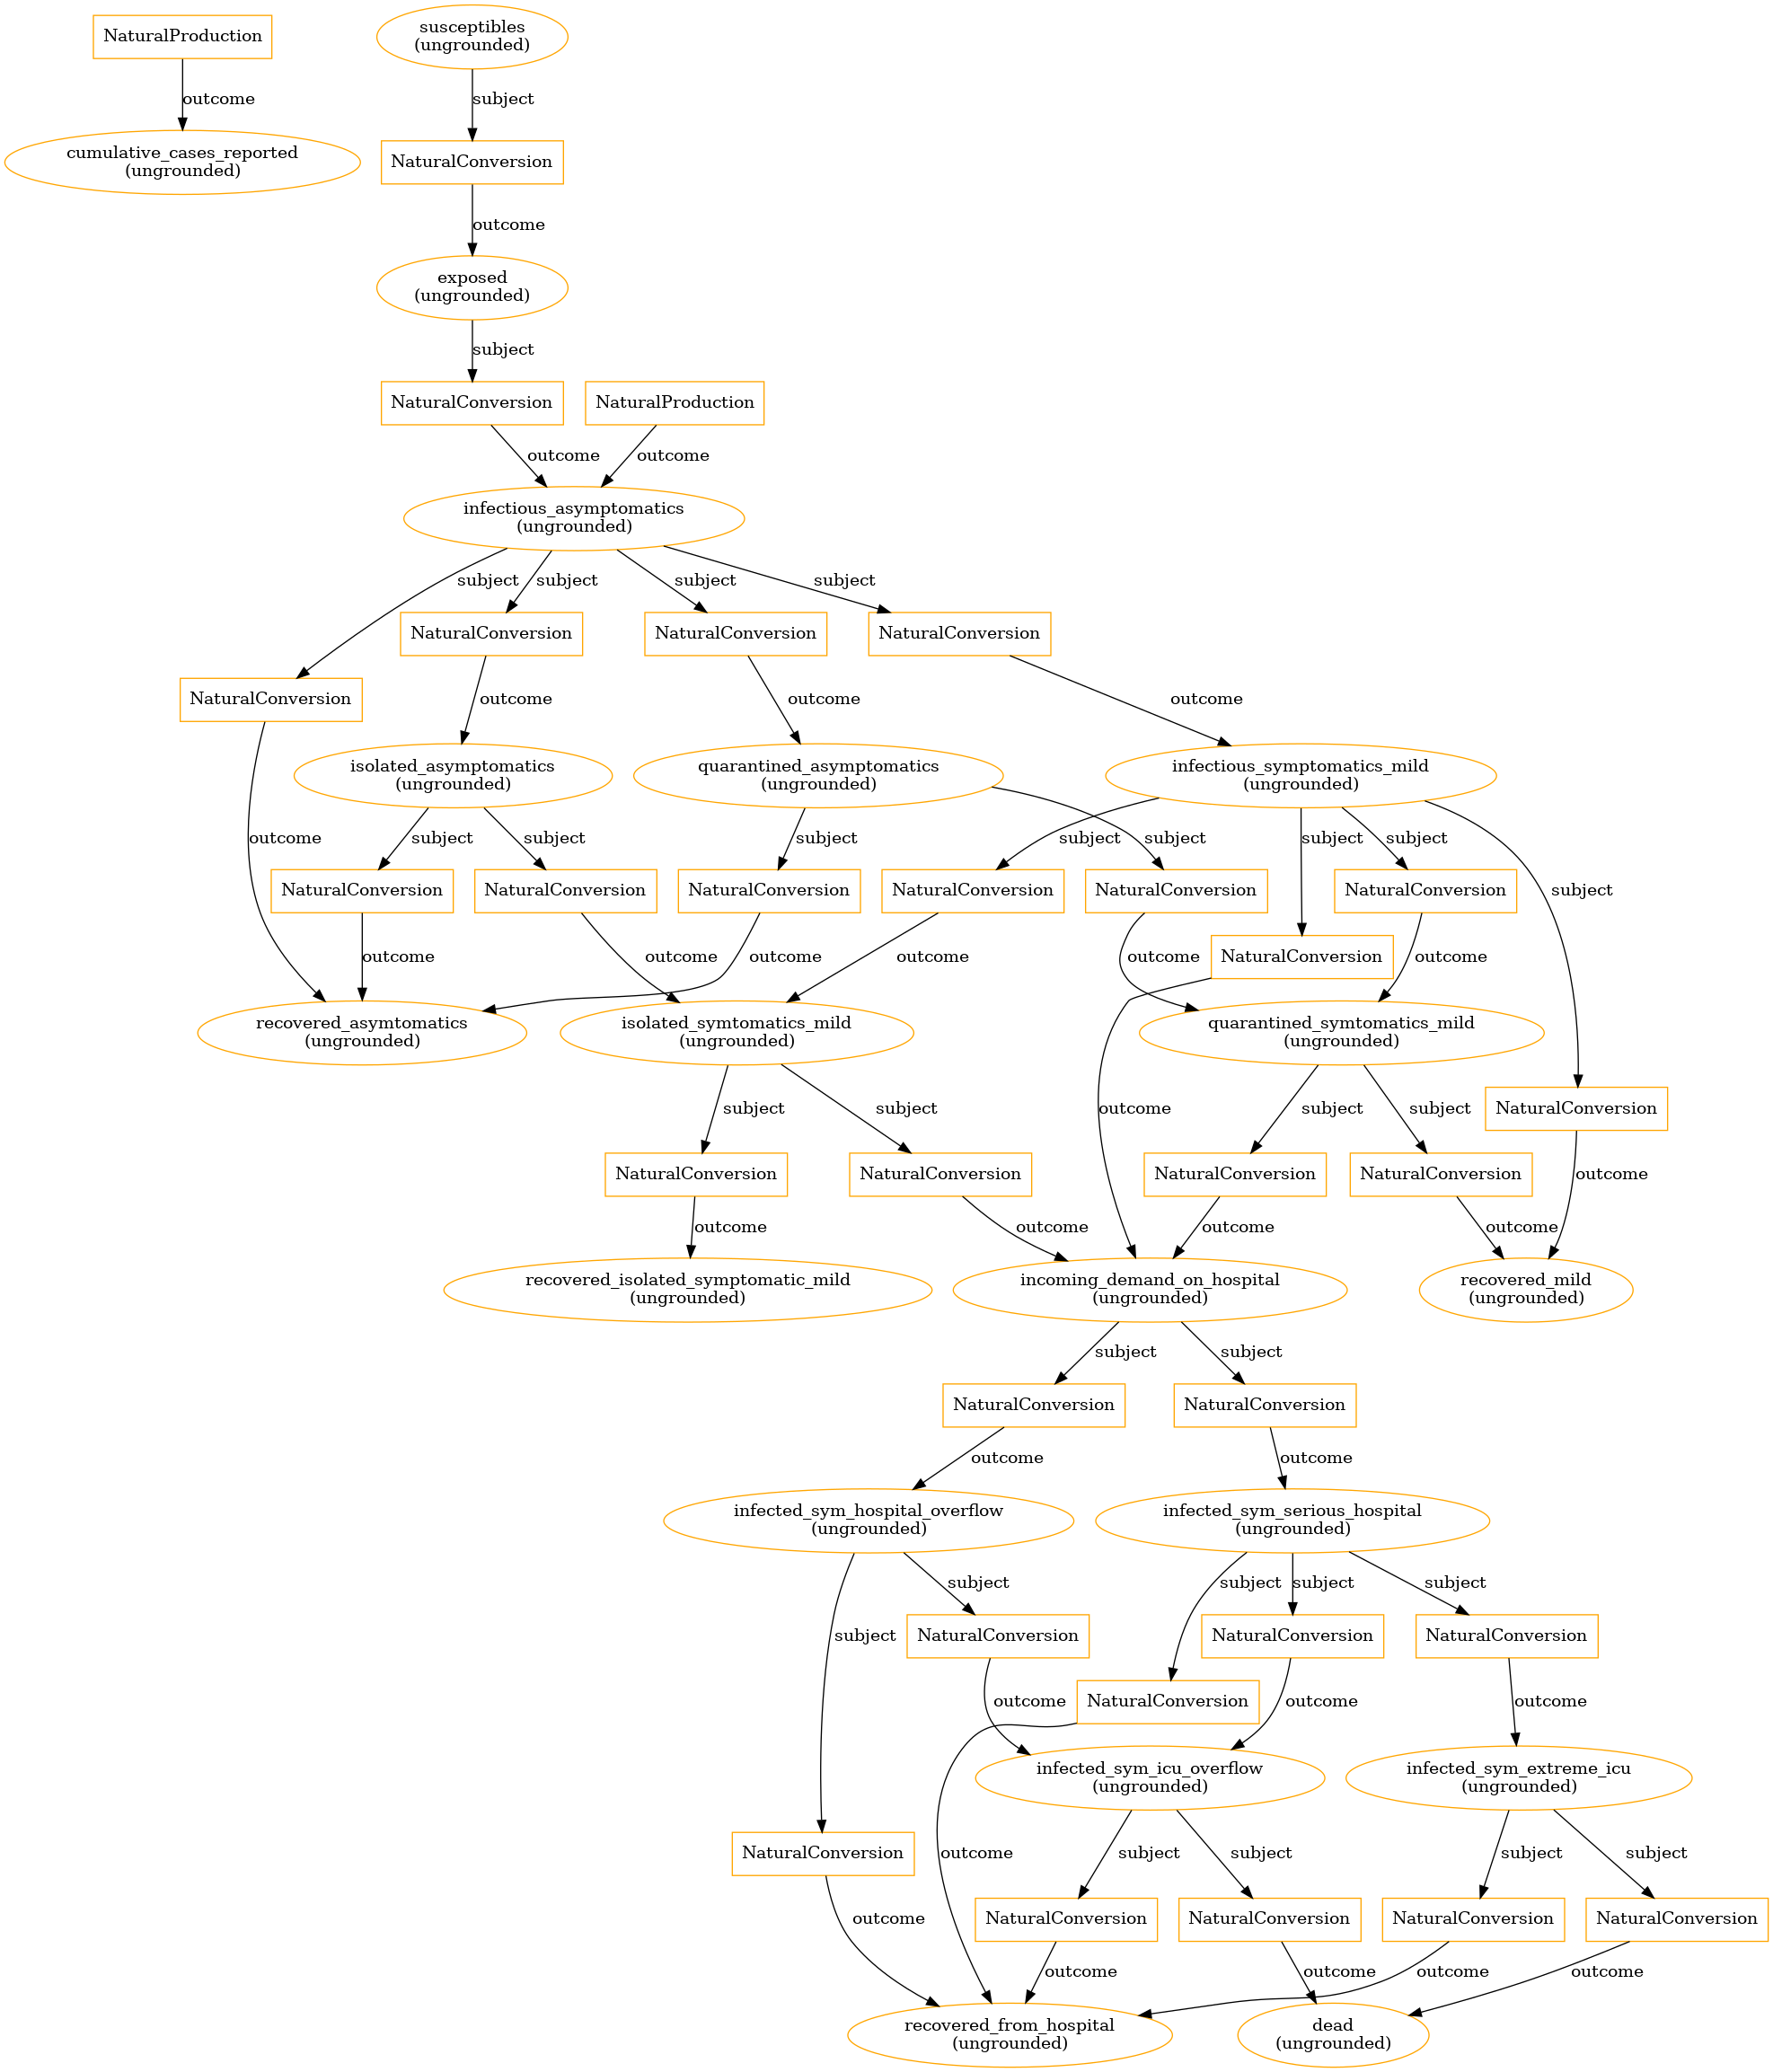

In [7]:
hackathon_file_url = (
    "https://raw.githubusercontent.com/DARPA-ASKEM/program-milestones/main/18-"
    "month-milestone/hackathon/epi/Scenario%205%20Supplemental/IndiaNonSubscriptedPulsed.mdl"
)
tm = template_model_from_mdl_url(hackathon_file_url)
tm.draw_jupyter()

## Print the parameters and their values

In [8]:
for parameter_name, parameter in tm.parameters.items():
    print(
        "parameter name: {} |  parameter value: {} \n".format(
            parameter_name, parameter.value
        )
    )

parameter name: open_duration |  parameter value: 10.0 

parameter name: end_lockdown_time |  parameter value: 400.0 

parameter name: lockdown_period |  parameter value: 0.0 

parameter name: high_contact_tracing_and_isolation |  parameter value: 0.0 

parameter name: net_fr_requiring_icu |  parameter value: 0.0 

parameter name: infection_rate_new_arrivals |  parameter value: 0.0 

parameter name: contacts_per_day |  parameter value: 0.0 

parameter name: hygiene_mask_impact |  parameter value: 0.0 

parameter name: net_fr_fatality |  parameter value: 0.0 

parameter name: interaction_intensity |  parameter value: 0.0 

parameter name: april_14 |  parameter value: 50.0 

parameter name: policy_high_contact_tracing_and_isolation |  parameter value: 0.0 

parameter name: base_contacts_other |  parameter value: 6.0 

parameter name: physical_distance_impact |  parameter value: 0.0 

parameter name: density_ratio |  parameter value: 1.0 

parameter name: effect_of_density_on_contacts |  

## Print the templates and their associated rate laws

A majority of rate laws for templates are the placeholder value of 0 as their rate-laws contain built-in Vensim functions and involve operations with series data which MIRA does not support yet.

In [9]:
for template in tm.templates:
    print(
        "template name: {} |  template rate law: {} \n".format(
            template.name, template.rate_law
        )
    )

template name: 1 |  template rate law: disease_progression + isolation_rate_asym + isolation_rate_sym + q_disease_progress_rate 

template name: 2 |  template rate law: 0 

template name: 3 |  template rate law: 0 

template name: 4 |  template rate law: contacts_total_per_susceptible*infectivity*susceptibles 

template name: 5 |  template rate law: 0 

template name: 6 |  template rate law: 0 

template name: 7 |  template rate law: 0 

template name: 8 |  template rate law: 0 

template name: 9 |  template rate law: 0 

template name: 10 |  template rate law: 0 

template name: 11 |  template rate law: 0 

template name: 12 |  template rate law: 0 

template name: 13 |  template rate law: 0 

template name: 14 |  template rate law: 0 

template name: 15 |  template rate law: 0 

template name: 16 |  template rate law: 0 

template name: 17 |  template rate law: 0 

template name: 18 |  template rate law: 0 

template name: 19 |  template rate law: 0 

template name: 20 |  template ra

## Display the output Stock and Flow amr for the MIRA template model created from ingesting the Vensim model

In [10]:
amr = template_model_to_stockflow_json(tm)
amr

{'header': {'name': 'SIR Model',
  'schema': '',
  'description': 'SIR Model',
  'schema_name': 'stockflow',
  'model_version': '0.1'},
 'properties': {},
 'model': {'flows': [{'id': '1',
    'name': 'new_cases_reported',
    'upstream_stock': None,
    'downstream_stock': 'cumulative_cases_reported',
    'rate_expression': 'disease_progression + isolation_rate_asym + isolation_rate_sym + q_disease_progress_rate',
    'rate_expression_mathml': '<apply><plus/><ci>disease_progression</ci><ci>isolation_rate_asym</ci><ci>isolation_rate_sym</ci><ci>q_disease_progress_rate</ci></apply>'},
   {'id': '2',
    'name': 'deaths',
    'upstream_stock': 'infected_sym_extreme_icu',
    'downstream_stock': 'dead',
    'rate_expression': '0',
    'rate_expression_mathml': '<cn>0</cn>'},
   {'id': '3',
    'name': 'deaths_overflow',
    'upstream_stock': 'infected_sym_icu_overflow',
    'downstream_stock': 'dead',
    'rate_expression': '0',
    'rate_expression_mathml': '<cn>0</cn>'},
   {'id': '4',
 